In [1]:
import xarray as xr
import netCDF4
import yaml
import sys
import os
import shutil
from scipy import ndimage
from pylab import *

import numpy             as np
import xarray            as xr
import cartopy.crs       as ccrs
import cartopy.feature   as cfeature
import matplotlib.cm     as cm
import matplotlib.pyplot as plt
import matplotlib        as mpl

NaN = np.nan
import warnings
warnings.filterwarnings("ignore")

# LOADING DATA

In [2]:
ncfile_dir = '/pampa/poitras/DATA/MODIS/MYD06_L2/NetCDF_LowMidHigh/NAM11/Cloud_Top_Pressure/2014/MYD06_L2_20140917_2000.nc'

ds_MODIS     = netCDF4.Dataset(ncfile_dir, 'r')
#### Data matrices ####
data_MODIS_t      = np.array(ds_MODIS['Tot_cloud_cover'][:])
data_MODIS_h      = np.array(ds_MODIS['High_cloud_cover'][:])
data_MODIS_m      = np.array(ds_MODIS['Mid_cloud_cover'][:])
data_MODIS_l      = np.array(ds_MODIS['Low_cloud_cover'][:])

### Missing Value matrices ####
missing_value_t   = ds_MODIS['Tot_cloud_cover'].getncattr('missing_value')
missing_value_h   = ds_MODIS['High_cloud_cover'].getncattr('missing_value')
missing_value_m   = ds_MODIS['Mid_cloud_cover'].getncattr('missing_value')
missing_value_l   = ds_MODIS['Low_cloud_cover'].getncattr('missing_value')

### Mask MODIS matrices ####

mask_MODIS_t      = np.where(data_MODIS_t == missing_value_t, 0, 1)
mask_MODIS_h      = np.where(data_MODIS_h == missing_value_h, 0, 1)
mask_MODIS_m      = np.where(data_MODIS_m == missing_value_m, 0, 1)
mask_MODIS_l      = np.where(data_MODIS_l == missing_value_l, 0, 1)

data_MODIS_t      = data_MODIS_t * mask_MODIS_t
data_MODIS_h      = data_MODIS_h * mask_MODIS_h
data_MODIS_m      = data_MODIS_m * mask_MODIS_m
data_MODIS_l      = data_MODIS_l * mask_MODIS_l

# SANITARY CHECK MATRIX

In [16]:
MODIS_dim  = ds_MODIS['Tot_cloud_cover'][:].shape
HML  = np.zeros(MODIS_dim)
check = np.zeros(MODIS_dim)
for i in range(len(data_MODIS_t)):   
    for j in range(len(data_MODIS_t[i])):
        t = data_MODIS_t[i][j]
        h = data_MODIS_h[i][j] 
        m = data_MODIS_m[i][j] 
        l = data_MODIS_l[i][j]
        HML[i][j] = h + m + l
        check[i][j] = t - HML[i][j] 
        
for i in range(len(check)): print(check[i])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# GETTING MRCC6 PROJECTION 

In [7]:
# Get lat, lon and cartopy_projection_object
lat = ds_MODIS['lat']
lon = ds_MODIS['lon']
m   = ccrs.RotatedPole(ds_MODIS['rotated_pole'].grid_north_pole_longitude, ds_MODIS['rotated_pole'].grid_north_pole_latitude)
xll, yll = m.transform_point(lon[ 0,  0],lat[ 0,  0], ccrs.PlateCarree())
xur, yur = m.transform_point(lon[-1, -1],lat[-1, -1], ccrs.PlateCarree())

L0_country_ALL = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',scale='50m',facecolor='none')


# TOTAL, HIGH, MID & LOW CLOUD COVER

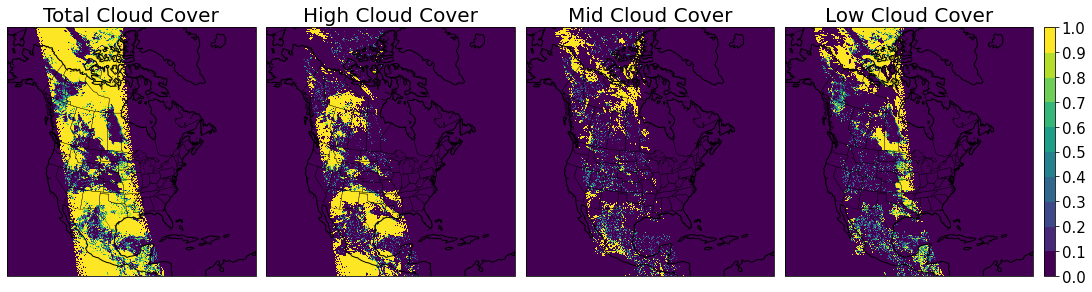

In [13]:
fig = plt.figure(figsize=(15, 15), constrained_layout = True)
vext = [0,1]
##########################################################################################################
###                                    Creating a discrete colorbar                                    ###
##########################################################################################################
# Discrete colors                                                                                      ###
cm = plt.get_cmap('viridis', 10)                                                                      ###
c  = plt.get_cmap('PiYG'   , 11)                                                                      ###
# Discrete color increment values                                                                      ###
bounds_maps  = np.linspace(0, 1, 11)                                                                   ###                                                                  
bounds_diff  = np.linspace(-1, 1, 11)                                                                  ###
# Norm                                                                                                 ###
norm_maps    = mpl.colors.BoundaryNorm(bounds_maps, ccm.N)                                             ###
norm_diff    = mpl.colors.BoundaryNorm(bounds_diff, cc.N)                                              ###
##########################################################################################################

#############################
###        MODIS          ###
#############################

###########################################################################
l1 = 0.02; l2 = 0.26; l3 = 0.50 ;l4= 0.74                               ### 
h  = 0.23; w  = 0.23 # h = height, w = width of the subplots (fraction) ###
b  = 0.73            # b = bottom height                                ###
fs = 13              # Fontsize for titles                              ###
###########################################################################
# First subplot
ax1 = plt.axes([l1, b, w, h],projection=m)
ax1.set_extent([xll, xur, yll, yur], crs = m)
ax1.set_title('Total Cloud Cover', fontsize = 20)
ax1.coastlines()
ax1.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
MODIS_t = ax1.pcolormesh(lon, lat,data_MODIS_t, cmap=cm,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree(), norm = norm_maps)

# Second subplot
ax2 = plt.axes([l2, b, w, h],projection=m)
ax2.set_extent([xll, xur, yll, yur], crs = m)
ax2.set_title('High Cloud Cover', fontsize = 20)
ax2.coastlines()
ax2.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
ax2.pcolormesh(lon, lat,data_MODIS_h , cmap=cm,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree(), norm = norm_maps)

# Third subplot
ax3 = plt.axes([l3, b, w, h],projection=m)
ax3.set_extent([xll, xur, yll, yur], crs = m)
ax3.set_title('Mid Cloud Cover', fontsize = 20)
ax3.coastlines()
ax3.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
ax3.pcolormesh(lon, lat,data_MODIS_m, cmap=cm,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree(), norm = norm_maps)

# Fourth subplot
ax4 = plt.axes([l4, b, w, h],projection=m)
ax4.set_extent([xll, xur, yll, yur], crs = m)
ax4.set_title('Low Cloud Cover', fontsize = 20)
ax4.coastlines()
ax4.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
ax4.pcolormesh(lon, lat,data_MODIS_l, cmap=cm,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree(), norm = norm_maps)

#############################
###   Colorbar setting    ###
#############################
cb_l = 0.98
#Colorbar             # [left,bottom,width,height]
cbar_ax1 = fig.add_axes([cb_l, 0.73, 0.01, 0.23])
cbar1    = fig.colorbar(MODIS_t, extend = 'neither', cax = cbar_ax1, ticks=bounds_maps, boundaries=bounds_maps)
cbar1.ax.tick_params(labelsize=15)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()
plt.close()

# TOTAL, HIGH + MID + LOW AND DIFFERENCE

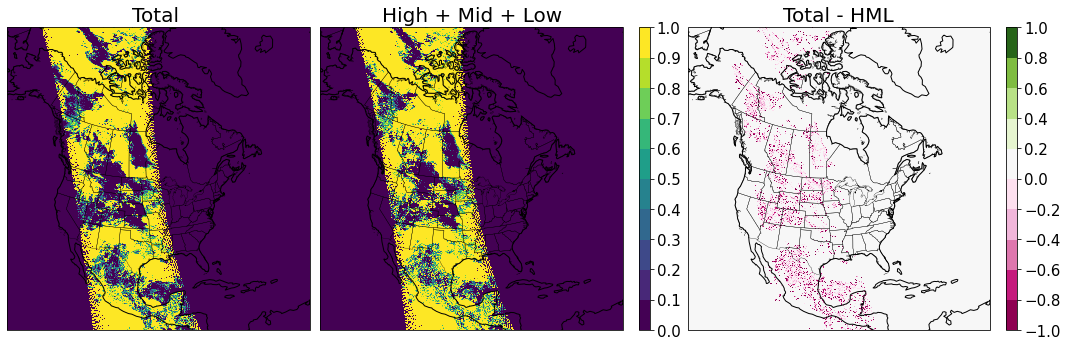

In [11]:
###########################################################################
l1 = 0.02; l2 = 0.31; l3 = 0.65                                         ### 
h  = 0.28; w  = 0.28 # h = height, w = width of the subplots (fraction) ###
b  = 0.73            # b = bottom height                                ###
fs = 13              # Fontsize for titles                              ###
###########################################################################
bounds_maps  = np.linspace(0, 1, 11)                                                                   
bounds_diff  = np.linspace(-1, 1, 11) 

ccm = plt.get_cmap('viridis', 10)
cc  = plt.get_cmap('PiYG'   , 11)

norm_maps    = mpl.colors.BoundaryNorm(bounds_maps, ccm.N)                                       ###
norm_diff    = mpl.colors.BoundaryNorm(bounds_diff, cc.N)

print(norm_maps)

fig = plt.figure(figsize=(15, 15), constrained_layout = True)
vext = [0,1]

ax = plt.axes([l1, b, w, h],projection=m)
ax.set_extent([xll, xur, yll, yur], crs = m)
ax.set_title('Total ', fontsize = 20)
ax.coastlines()
ax.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
MODIS_t    = ax.pcolormesh(lon, lat, data_MODIS_t, cmap=ccm,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree(), norm = norm_maps)

ax1 = plt.axes([l2, b, w, h],projection=m)
ax1.set_extent([xll, xur, yll, yur], crs = m)
ax1.set_title('High + Mid + Low', fontsize = 20)
ax1.coastlines()
ax1.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
MODIS_hml  = ax1.pcolormesh(lon, lat, HML        , cmap=ccm,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree(), norm = norm_maps)

ax2 = plt.axes([l3, b, w, h],projection=m)
ax2.set_extent([xll, xur, yll, yur], crs = m)
ax2.set_title('Total - HML', fontsize = 20)
ax2.coastlines()
ax2.add_feature(L0_country_ALL, edgecolor='black', linewidth = 0.3)
MODIS_check = ax2.pcolormesh(lon, lat, check, cmap=cc,vmin=-1, vmax=1, transform=ccrs.PlateCarree(), norm = norm_diff)

#############################
###   Colorbar setting    ###
#############################
cb_2 = 0.945
#Colorbar             # [left,bottom,width,height]
cbar_ax1 = fig.add_axes([0.605, 0.73, 0.01, 0.28])
cbar1    = fig.colorbar(MODIS_t    , extend = 'neither', cax = cbar_ax1, ticks=bounds_maps, boundaries=bounds_maps)
cbar1.ax.tick_params(labelsize=15)

cbar_ax2 = fig.add_axes([0.945, 0.73, 0.01, 0.28])
cbar2    = fig.colorbar(MODIS_check, extend = 'neither', cax = cbar_ax2, ticks=bounds_diff, boundaries=bounds_diff)
cbar2.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()